### 1.2.1 :  Advanced Feature Extraction.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import os
os.chdir('C:/Users/Abhishek/Desktop/Case Studies/AI ML/Quora Question Pair')

In [2]:
import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
# This package is used for finding longest common subsequence between two strings
# you can write your own dp code for this
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE
# Import the Required lib packages for WORD-Cloud generation
# https://sos.chdir("C:/Users/Abhishek/Desktop/Case Studies/AI ML/Quora Question Pair")tackoverflow.com/questions/45625434/how-to-install-wordcloud-in-python3-6
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image

In [3]:
#We are using the ready file, BUt later save ours from File 1 and use that
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
    df = df.fillna('')
    df.head()
else:
    print("get df_fe_without_preprocessing_train.csv from drive or run the previous notebook")

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [4]:
data.question2

0         What is the step by step guide to invest in sh...
1         What would happen if the Indian government sto...
2         How can Internet speed be increased by hacking...
3         Find the remainder when [math]23^{24}[/math] i...
4                   Which fish would survive in salt water?
                                ...                        
404285    How many keywords are there in PERL Programmin...
404286           Is it true that there is life after death?
404287                                    What's this coin?
404288    I am having little hairfall problem but I want...
404289        What is it like to have sex with your cousin?
Name: question2, Length: 404290, dtype: object

## First Need to Preprocessing the Text

- Preprocessing:
    - Removing html tags 
    - Removing Punctuations
    - Performing stemming
    - Removing Stopwords
    - Expanding contractions ex :replace("€", " euro ").replace("'ll", " will") etc

# 1.Function  for PreProcessing :

In [6]:
# Function for PreProcessing :

StopWords = stopwords.words('english')

def preprocess(x):
    x=str(x).lower() # Convert to String and make it Lower Case
    # Replacing ex" 1000 with 1K
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)  # Ex 'Hello i have 9000000 Rupees' becomes 'Hello i have 9m Rupees'
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    porter = PorterStemmer() #Stemming is the process of reducing inflection in words to their root forms
    pattern = re.compile('\W') #\d Matches any decimal digit; this is equivalent to the class [0-9].
                               #\D Matches any non-digit character; this is equivalent to the class [^0-9].
                               #\s Matches any whitespace character; this is equivalent to the class [ \t\n\r\f\v].
                               #\S Matches any non-whitespace character; this is equivalent to the class [^ \t\n\r\f\v].
                               #\w Matches any alphanumeric character; this is equivalent to the class [a-zA-Z0-9_].
                               #\W Matches any non-alphanumeric character; this is equivalent to the class [^a-zA-Z0-9_].
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x
    

---

## Advanced Feature Extraction (NLP and Fuzzy Features)

Definition:
- __Token__: You get a token by splitting sentence a space
- __Stop_Word__ : stop words as per NLTK.
- __Word__ : A token that is not a stop_word


Features:
- __cwc_min__ :  Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
<br>
<br>
- __cwc_max__ :  Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
<br>
<br>
- __csc_min__ :  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
<br>
<br>
- __csc_max__ :  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
<br>
<br>
- __ctc_min__ :  Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
<br>
<br>

- __ctc_max__ :  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
<br>
<br>
        
- __last_word_eq__ :  Check if First word of both questions is equal or not<br>last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
<br>
<br>

- __first_word_eq__ :  Check if First word of both questions is equal or not<br>first_word_eq = int(q1_tokens[0] == q2_tokens[0])
<br>
<br>
        
- __abs_len_diff__ :  Abs. length difference<br>abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
<br>
<br>

- __mean_len__ :  Average Token Length of both Questions<br>mean_len = (len(q1_tokens) + len(q2_tokens))/2
<br>
<br>


- __fuzz_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>

- __fuzz_partial_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_sort_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_set_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>





- __longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br>longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))


---

# 2. Define Function,which Creates all Data to help us Derived Advanced Features.

## Define Utility function : Cuz its info will be used to make our Advances Features
#### To Calculates the Features above, we will need some basic Information which we will calculate and store in variables, So it is easy to Define the Above Functions

In [7]:
#Take both Q1 and Q2 as argument

SAFE_DIV = 0.0001 # To Avoid multiplying/Dividing by zero(I GUESS FOR NOW)

def utility_data(x,y): 
    token_features = [0.0]*10
    
    #Convert them into Tokens
    q1_tokens=x.split()
    q2_tokens=y.split()
    
    # Exit Condition : If length of either of Q1 or Q2 are 0 then exit
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    
    # Get the non-stopwords in Questions
    q1_words=set([word for word in q1_tokens if word not in StopWords]) #For Q1 i.e x
    q2_words=set([word for word in q2_tokens if word not in StopWords]) #For Q2 i.e y
    
    #Get the stopwords in Questions
    q1_Stopwords=set([word for word in q1_tokens if word in StopWords]) #For Q1 i.e x
    q2_Stopwords=set([word for word in q2_tokens if word in StopWords]) #For Q2 i.e y
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_Stopwords.intersection(q2_Stopwords))
    
    # Get the common Tokens from Question pair (Token i.e could be Stopword or non-Stopword)
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)    #cwc_min
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)    #cwc_max
    
    token_features[2] = common_stop_count / (min(len(q1_Stopwords), len(q2_Stopwords)) + SAFE_DIV)    #csc_min
    token_features[3] = common_stop_count / (max(len(q1_Stopwords), len(q2_Stopwords)) + SAFE_DIV)    #csc_max
    
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV) #ctc_min
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV) #ctc_min
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])      #last_word_eq                        
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])        #first_word_eq
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))     #abs_len_diff
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2     #mean_len
    return token_features

# 3.Function to get the Longest Common sub string

In [8]:
#Function to get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

---

## Now call the 3 functions we Defined Above to get our Features

In [9]:
def extract_features(data):
    
    # First use preprocess(): for preprocessing each question
    data["question1"] = data["question1"].fillna("").apply(preprocess)
    data["question2"] = data["question2"].fillna("").apply(preprocess)

    print("token features...")
    
    # Merging Features with dataset
    token_features = data.apply(lambda x: utility_data(x["question1"], x["question2"]), axis=1)
    
    data["cwc_min"]       = list(map(lambda x: x[0], token_features))
    data["cwc_max"]       = list(map(lambda x: x[1], token_features))
    data["csc_min"]       = list(map(lambda x: x[2], token_features))
    data["csc_max"]       = list(map(lambda x: x[3], token_features))
    data["ctc_min"]       = list(map(lambda x: x[4], token_features))
    data["ctc_max"]       = list(map(lambda x: x[5], token_features))
    data["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    data["first_word_eq"] = list(map(lambda x: x[7], token_features))
    data["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    data["mean_len"]      = list(map(lambda x: x[9], token_features))
    
    print("fuzzy features..")

    data["token_set_ratio"]       = data.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    data["token_sort_ratio"]      = data.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    data["fuzz_ratio"]            = data.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    data["fuzz_partial_ratio"]    = data.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    data["longest_substr_ratio"]  = data.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return data

### IMplement this once Testing done so processing doent take time
if os.path.isfile('nlp_features_train.csv'):
    df = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
    df.fillna('')
else:
    print("Extracting features for train:")
    df = pd.read_csv("train.csv")
    df = extract_features(df)
    df.to_csv("nlp_features_train.csv", index=False)
df.head(2)

In [10]:
print("Extracting features for train:")
data = pd.read_csv("train.csv")
data = extract_features(data)
#data.to_csv("nlp_features_train.csv", index=False)
data.head(2)

Extracting features for train:
token features...
fuzzy features..


,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,...,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,...,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154


<h3>3.5.1 Analysis of extracted features </h3>
<h2>Using Word Cloud<h2>
    
 - Creating Word Cloud of Duplicates and Non-Duplicates Question pairs
 - We can observe the most frequent occuring words

In [29]:
# To check if any words occur more frequently than the other words, using WordCloud

data_duplicate = data[data["is_duplicate"]==1]    #All the Duplicate Data
data_nonduplicate = data[data["is_duplicate"]==0]  #All the Non-Duplicate Data

# Converting 2d array of q1 and q2 and flatten the array (ONLY Q1 AND Q2 columns)
flat_duplicate = np.dstack([data_duplicate["question1"],data_duplicate["question2"]]).flatten()
flat_Nonduplicate = np.dstack([data_nonduplicate["question1"],data_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(flat_duplicate))
print ("Number of data points in class 0 (non duplicate pairs) :",len(flat_Nonduplicate))


#Comment becaus it had error,and we already have these files

#Saving the np array into a text file
#np.savetxt('ME_train_dup.txt', flat_duplicate, delimiter=' ', fmt='%s')
#np.savetxt('ME_train_nodup.txt', flat_Nonduplicate, delimiter=' ', fmt='%s')
#OR
#with open(fname, "w", encoding="utf-8") as f:
#f.write(html)

Number of data points in class 1 (duplicate pairs) : 298526
Number of data points in class 0 (non duplicate pairs) : 510054


In [3]:
# reading the text files and removing the Stop Words:
d = path.dirname('.')

textp_w = open(path.join(d, 'train_p.txt')).read()
textn_w = open(path.join(d, 'train_n.txt')).read()
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.remove("not")

stopwords.remove("no")
#stopwords.remove("good")
#stopwords.remove("love")
stopwords.remove("like")
#stopwords.remove("best")
#stopwords.remove("!")
print ("Total number of words in duplicate pair questions :",len(textp_w))
print ("Total number of words in non duplicate pair questions :",len(textn_w))

Total number of words in duplicate pair questions : 16109886
Total number of words in non duplicate pair questions : 3335825


## Now we Genarate the WordCloud

### 1. Word Clouds generated from  duplicate pair question's text

Word Cloud for Duplicate Question pairs


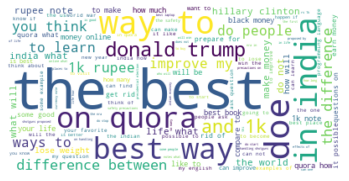

In [4]:
wc = WordCloud(background_color="white", max_words=len(textp_w), stopwords=stopwords)
wc.generate(textp_w)
print ("Word Cloud for Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2.Word Clouds generated from non duplicate pair question's text

Word Cloud for non-Duplicate Question pairs:


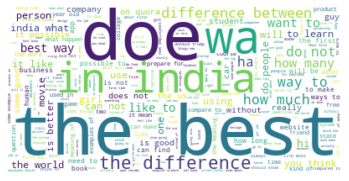

In [5]:
wc = WordCloud(background_color="white", max_words=len(textn_w),stopwords=stopwords)
# generate word cloud
wc.generate(textn_w)
print ("Word Cloud for non-Duplicate Question pairs:")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

- We can clearly see there are certain words that occur most frequenlty in both Duplicate and Non-Duplicate sentences.
- There are also some words that occur in both Duplicate and Non-Duplicate sentences.

In [6]:
data.corr()
#token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,ctc_min,ctc_max,last_word_eq Have decebt correlation i.e Above 30

NameError: name 'data' is not defined

<h4> 3.5.1.2 Pair plot of features ['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'] </h4>

In [ ]:
n = df.shape[0]
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

###############################################################
#ctc_min (Histogram): Classes are well separated
#cwc_min (Histogram): Classes are well separated at the edges 
#csc_min (Histogram): NOt Separable
#token_sort_ratio (Histogram) : Separable but both classes are very close

##csc_min'&ctc_min (Pairplots): look like having some value
#cwc_min & token_sort_ratio Pairplots): look like having some value
#csc_min  token_sort_ratio Pairplots): look like having some value

In [ ]:
# Distribution of the token_sort_ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()


############################
#In the pdf there is some overlap, but there are separable points as well.
#class 1 data tends to have larger Token sorty ratio

#violen : They dont overlap, so it can be of value

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

<h3>Visualization </h3>

In [ ]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

dfp_subsampled = df[0:5000]
X = MinMaxScaler().fit_transform(dfp_subsampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = dfp_subsampled['is_duplicate'].values

In [ ]:
tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

# 3-D

In [ ]:
from sklearn.manifold import TSNE
tsne3d = TSNE(
    n_components=3,      #Because we want 3-D
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

In [ ]:
trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')